In [7]:
import os
import cv2
import numpy as np
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from IPython.display import display, Image
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet import preprocess_input
%matplotlib inline
import matplotlib.image as mpimg
import os

In [41]:
datagen = ImageDataGenerator(rotation_range=20,
                            zoom_range=0.2,
                            width_shift_range=0.2, 
                            height_shift_range=0.2, 
                            shear_range=0.2,
                            horizontal_flip=True, 
                            preprocessing_function= preprocess_input,
                            fill_mode='nearest')

train_generator = datagen.flow_from_directory('/home/dip_3/MasterFolder/SplitData/Train',
                                            target_size=(224, 224),
                                            color_mode='rgb',batch_size=19,
                                            class_mode='categorical',
                                            seed = 42,
                                            shuffle=True)


validate_generator = datagen.flow_from_directory('/home/dip_3/MasterFolder/SplitData/Valid',target_size=(224, 224),
                                            color_mode='rgb',batch_size=4,
                                            class_mode='categorical',
                                            seed = 50,
                                            shuffle=True)

Found 11895 images belonging to 4 classes.
Found 2549 images belonging to 4 classes.


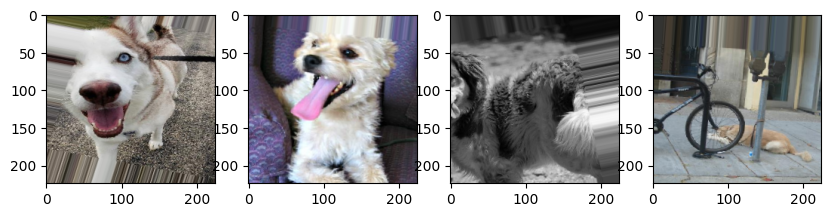

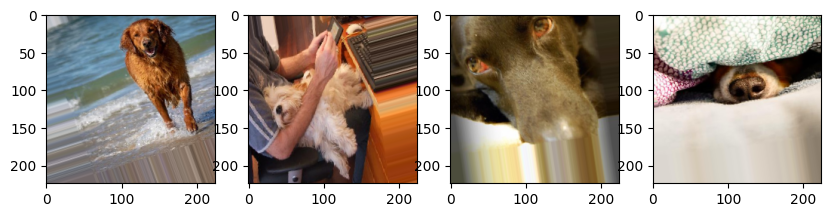

In [50]:
batch = train_generator.next()
img_val = [(img + 1.0) / 2.0 for img in batch]

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(img_val[0][i])
plt.savefig(f'train_generator.png')

batch = validate_generator.next()
img_val = [(img + 1.0) / 2.0 for img in batch]

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(img_val[0][i])

In [54]:
input_shape_resnet = (224, 224, 3)
input_shape_densenet = (224, 224, 3)
input_shape_efficientnet = (224, 224, 3)
# Load pre-trained ResNet50 model and remove the top classification layer
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape_resnet)
resnet_base_model.trainable = False

# Add custom classification head to the ResNet model
resnet_global_avg_pooling = GlobalAveragePooling2D()(resnet_base_model.output)
resnet_output = Dense(4, activation='softmax')(resnet_global_avg_pooling)
resnet_model = Model(inputs=resnet_base_model.input, outputs=resnet_output)

# Compile the ResNet model
resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


densenet_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape_densenet)
densenet_base_model.trainable = False


densenet_global_avg_pooling = GlobalAveragePooling2D()(densenet_base_model.output)
densenet_output = Dense(4, activation='softmax')(densenet_global_avg_pooling)
densenet_model = Model(inputs=densenet_base_model.input, outputs=densenet_output)


densenet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


efficientnet_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape_efficientnet)
efficientnet_base_model.trainable = False


efficientnet_global_avg_pooling = GlobalAveragePooling2D()(efficientnet_base_model.output)
efficientnet_output = Dense(4, activation='softmax')(efficientnet_global_avg_pooling)
efficientnet_model = Model(inputs=efficientnet_base_model.input, outputs=efficientnet_output)


efficientnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-7)

# Train the models
'''
train the models on resized training data and validation split,
monitoring the validation loss and using the
early stopping and learning rate scheduling callbacks to stop when necessary.
'''


ep_r=40
resnet_history = resnet_model.fit_generator(generator=train_generator, validation_data=validate_generator , epochs=ep_r,validation_steps = step_size_val,verbose = 1 ,callbacks=[early_stopping, lr_scheduler])
densenet_history = densenet_model.fit_generator(generator=train_generator, validation_data=validate_generator , epochs=ep_r,validation_steps = step_size_val,verbose = 1 ,callbacks=[early_stopping, lr_scheduler])
efficientnet_history =  efficientnet_model.fit_generator(generator=train_generator, validation_data=validate_generator , epochs=ep_r,validation_steps = step_size_val,verbose = 1 ,callbacks=[early_stopping, lr_scheduler])

Epoch 1/40


/tmp/ipykernel_1070920/2981564030.py:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resnet_history = resnet_model.fit_generator(generator=train_generator, validation_data=validate_generator , epochs=ep_r,validation_steps = step_size_val,verbose = 1 ,callbacks=[early_stopping, lr_scheduler])


627/627 [==============================] - 121s 190ms/step - loss: 1.3595 - accuracy: 0.3361 - val_loss: 1.3604 - val_accuracy: 0.3418 - lr: 0.0010
Epoch 2/40
627/627 [==============================] - 118s 187ms/step - loss: 1.3442 - accuracy: 0.3445 - val_loss: 1.3367 - val_accuracy: 0.3650 - lr: 0.0010
Epoch 3/40
627/627 [==============================] - 119s 189ms/step - loss: 1.3375 - accuracy: 0.3549 - val_loss: 1.3236 - val_accuracy: 0.3783 - lr: 0.0010
Epoch 4/40
627/627 [==============================] - 118s 189ms/step - loss: 1.3428 - accuracy: 0.3595 - val_loss: 1.3828 - val_accuracy: 0.3265 - lr: 0.0010
Epoch 5/40
627/627 [==============================] - 119s 189ms/step - loss: 1.3306 - accuracy: 0.3677 - val_loss: 1.3101 - val_accuracy: 0.3925 - lr: 0.0010
Epoch 6/40
627/627 [==============================] - 118s 188ms/step - loss: 1.3310 - accuracy: 0.3643 - val_loss: 1.3368 - val_accuracy: 0.3662 - lr: 0.0010
Epoch 7/40
627/627 [==============================] - 119

/tmp/ipykernel_1070920/2981564030.py:54: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  densenet_history = densenet_model.fit_generator(generator=train_generator, validation_data=validate_generator , epochs=ep_r,validation_steps = step_size_val,verbose = 1 ,callbacks=[early_stopping, lr_scheduler])


Epoch 1/40
627/627 [==============================] - 123s 190ms/step - loss: 1.3066 - accuracy: 0.4204 - val_loss: 1.2670 - val_accuracy: 0.4611 - lr: 0.0010
Epoch 2/40
627/627 [==============================] - 119s 190ms/step - loss: 1.1832 - accuracy: 0.4967 - val_loss: 1.1389 - val_accuracy: 0.5259 - lr: 0.0010
Epoch 3/40
627/627 [==============================] - 119s 190ms/step - loss: 1.1569 - accuracy: 0.5050 - val_loss: 1.1406 - val_accuracy: 0.5161 - lr: 0.0010
Epoch 4/40
627/627 [==============================] - 119s 189ms/step - loss: 1.1455 - accuracy: 0.5148 - val_loss: 1.1780 - val_accuracy: 0.4949 - lr: 0.0010
Epoch 5/40
627/627 [==============================] - 119s 189ms/step - loss: 1.1370 - accuracy: 0.5221 - val_loss: 1.1410 - val_accuracy: 0.5130 - lr: 0.0010
Epoch 6/40
627/627 [==============================] - 119s 190ms/step - loss: 1.1285 - accuracy: 0.5232 - val_loss: 1.1640 - val_accuracy: 0.5035 - lr: 0.0010
Epoch 7/40
627/627 [==========================

/tmp/ipykernel_1070920/2981564030.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  efficientnet_history =  efficientnet_model.fit_generator(generator=train_generator, validation_data=validate_generator , epochs=ep_r,validation_steps = step_size_val,verbose = 1 ,callbacks=[early_stopping, lr_scheduler])


Epoch 1/40
627/627 [==============================] - 122s 189ms/step - loss: 1.3754 - accuracy: 0.2826 - val_loss: 1.3540 - val_accuracy: 0.3273 - lr: 0.0010
Epoch 2/40
627/627 [==============================] - 117s 187ms/step - loss: 1.3725 - accuracy: 0.2894 - val_loss: 1.3582 - val_accuracy: 0.2841 - lr: 0.0010
Epoch 3/40
627/627 [==============================] - 118s 188ms/step - loss: 1.3734 - accuracy: 0.2882 - val_loss: 1.3559 - val_accuracy: 0.3073 - lr: 0.0010
Epoch 4/40
627/627 [==============================] - 120s 191ms/step - loss: 1.3708 - accuracy: 0.2911 - val_loss: 1.3540 - val_accuracy: 0.3034 - lr: 0.0010
Epoch 5/40
627/627 [==============================] - 119s 189ms/step - loss: 1.3725 - accuracy: 0.2894 - val_loss: 1.3937 - val_accuracy: 0.2983 - lr: 0.0010
Epoch 6/40
627/627 [==============================] - 117s 186ms/step - loss: 1.3703 - accuracy: 0.2876 - val_loss: 1.3589 - val_accuracy: 0.2979 - lr: 0.0010
Epoch 7/40
627/627 [==========================

In [66]:
densenet_model.save('densenet_model.h5')
resnet_model.save('resnet_model.h5')
efficientnet_model.save('efficientnet_model.h5')

In [58]:
test_generator=datagen.flow_from_directory('/home/dip_3/MasterFolder/SplitData/Test',
    target_size=(224,224), color_mode='rgb',
    batch_size=1,
    class_mode='categorical', 
    seed = 42,
    shuffle=False)

Found 2551 images belonging to 4 classes.


In [73]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = test_generator.classes
#get name of classes
class_labels = list(test_generator.class_indices.keys())
print(f"class_labels: {class_labels}")
preds = densenet_model.predict_generator(test_generator)
print(preds.shape)
print(preds)

y_pred = np.argmax(preds,axis=1)
print(test_generator.classes)
print(y_pred)
#plot graph heatmap compare true and predict

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))
#crate matrix


class_labels: ['Angry', 'Happy', 'Other', 'Sad']


/tmp/ipykernel_1070920/2835476669.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = densenet_model.predict_generator(test_generator)


(2551, 4)
[[0.71682537 0.03275007 0.11467388 0.1357507 ]
 [0.07383869 0.6688449  0.18050474 0.07681167]
 [0.11732288 0.64679563 0.14768225 0.08819928]
 ...
 [0.5621445  0.10180505 0.26345617 0.07259423]
 [0.27232832 0.56116086 0.09751657 0.06899423]
 [0.07379913 0.20242706 0.389939   0.33383486]]
[0 0 0 ... 3 3 3]
[0 1 1 ... 0 1 2]
[[ 70 146  87  76]
 [ 30 520 131  78]
 [ 38 166 356 132]
 [ 34 120 181 386]]
              precision    recall  f1-score   support

           0       0.41      0.18      0.25       379
           1       0.55      0.69      0.61       759
           2       0.47      0.51      0.49       692
           3       0.57      0.54      0.55       721

    accuracy                           0.52      2551
   macro avg       0.50      0.48      0.48      2551
weighted avg       0.51      0.52      0.51      2551



In [71]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_true = test_generator.classes
#get name of classes
class_labels = list(test_generator.class_indices.keys())
print(f"class_labels: {class_labels}")
preds = resnet_model.predict_generator(test_generator)
print(preds.shape)
print(preds)

y_pred = np.argmax(preds,axis=1)
print(test_generator.classes)
print(y_pred)
#plot graph heatmap compare true and predict

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

class_labels: ['Angry', 'Happy', 'Other', 'Sad']


/tmp/ipykernel_1070920/2823488853.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = resnet_model.predict_generator(test_generator)


(2551, 4)
[[0.22090118 0.25530386 0.29272532 0.23106965]
 [0.17289159 0.4650468  0.21434471 0.14771695]
 [0.18276131 0.34215808 0.21595742 0.25912318]
 ...
 [0.15244973 0.22237045 0.32315597 0.30202386]
 [0.21838887 0.27182877 0.18882398 0.32095835]
 [0.15702124 0.20072645 0.32952356 0.31272876]]
[0 0 0 ... 3 3 3]
[2 1 1 ... 2 3 2]
[[  9 153 122  95]
 [  4 380 198 177]
 [  4 215 290 183]
 [  2 207 223 289]]
              precision    recall  f1-score   support

           0       0.47      0.02      0.05       379
           1       0.40      0.50      0.44       759
           2       0.35      0.42      0.38       692
           3       0.39      0.40      0.39       721

    accuracy                           0.38      2551
   macro avg       0.40      0.34      0.32      2551
weighted avg       0.39      0.38      0.35      2551



In [72]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = test_generator.classes
#get name of classes
class_labels = list(test_generator.class_indices.keys())
print(f"class_labels: {class_labels}")
preds = efficientnet_model.predict_generator(test_generator)
print(preds.shape)
print(preds)

y_pred = np.argmax(preds,axis=1)
print(test_generator.classes)
print(y_pred)
#plot graph heatmap compare true and predict

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

class_labels: ['Angry', 'Happy', 'Other', 'Sad']


/tmp/ipykernel_1070920/973611930.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = efficientnet_model.predict_generator(test_generator)


(2551, 4)
[[0.13630916 0.29287562 0.27547336 0.29534182]
 [0.13666542 0.29596448 0.27512535 0.29224467]
 [0.1347216  0.28874946 0.27671772 0.2998112 ]
 ...
 [0.1345943  0.2883202  0.2762919  0.3007936 ]
 [0.13491316 0.2893838  0.27614346 0.29955956]
 [0.13563901 0.29245827 0.2768749  0.29502782]]
[0 0 0 ... 3 3 3]
[3 1 3 ... 3 3 3]
[[  0 234   0 145]
 [  0 479   0 280]
 [  0 414   0 278]
 [  0 390   0 331]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       379
           1       0.32      0.63      0.42       759
           2       0.00      0.00      0.00       692
           3       0.32      0.46      0.38       721

    accuracy                           0.32      2551
   macro avg       0.16      0.27      0.20      2551
weighted avg       0.18      0.32      0.23      2551



/home/dip_3/miniconda3/envs/tf-jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dip_3/miniconda3/envs/tf-jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dip_3/miniconda3/envs/tf-jupyter/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

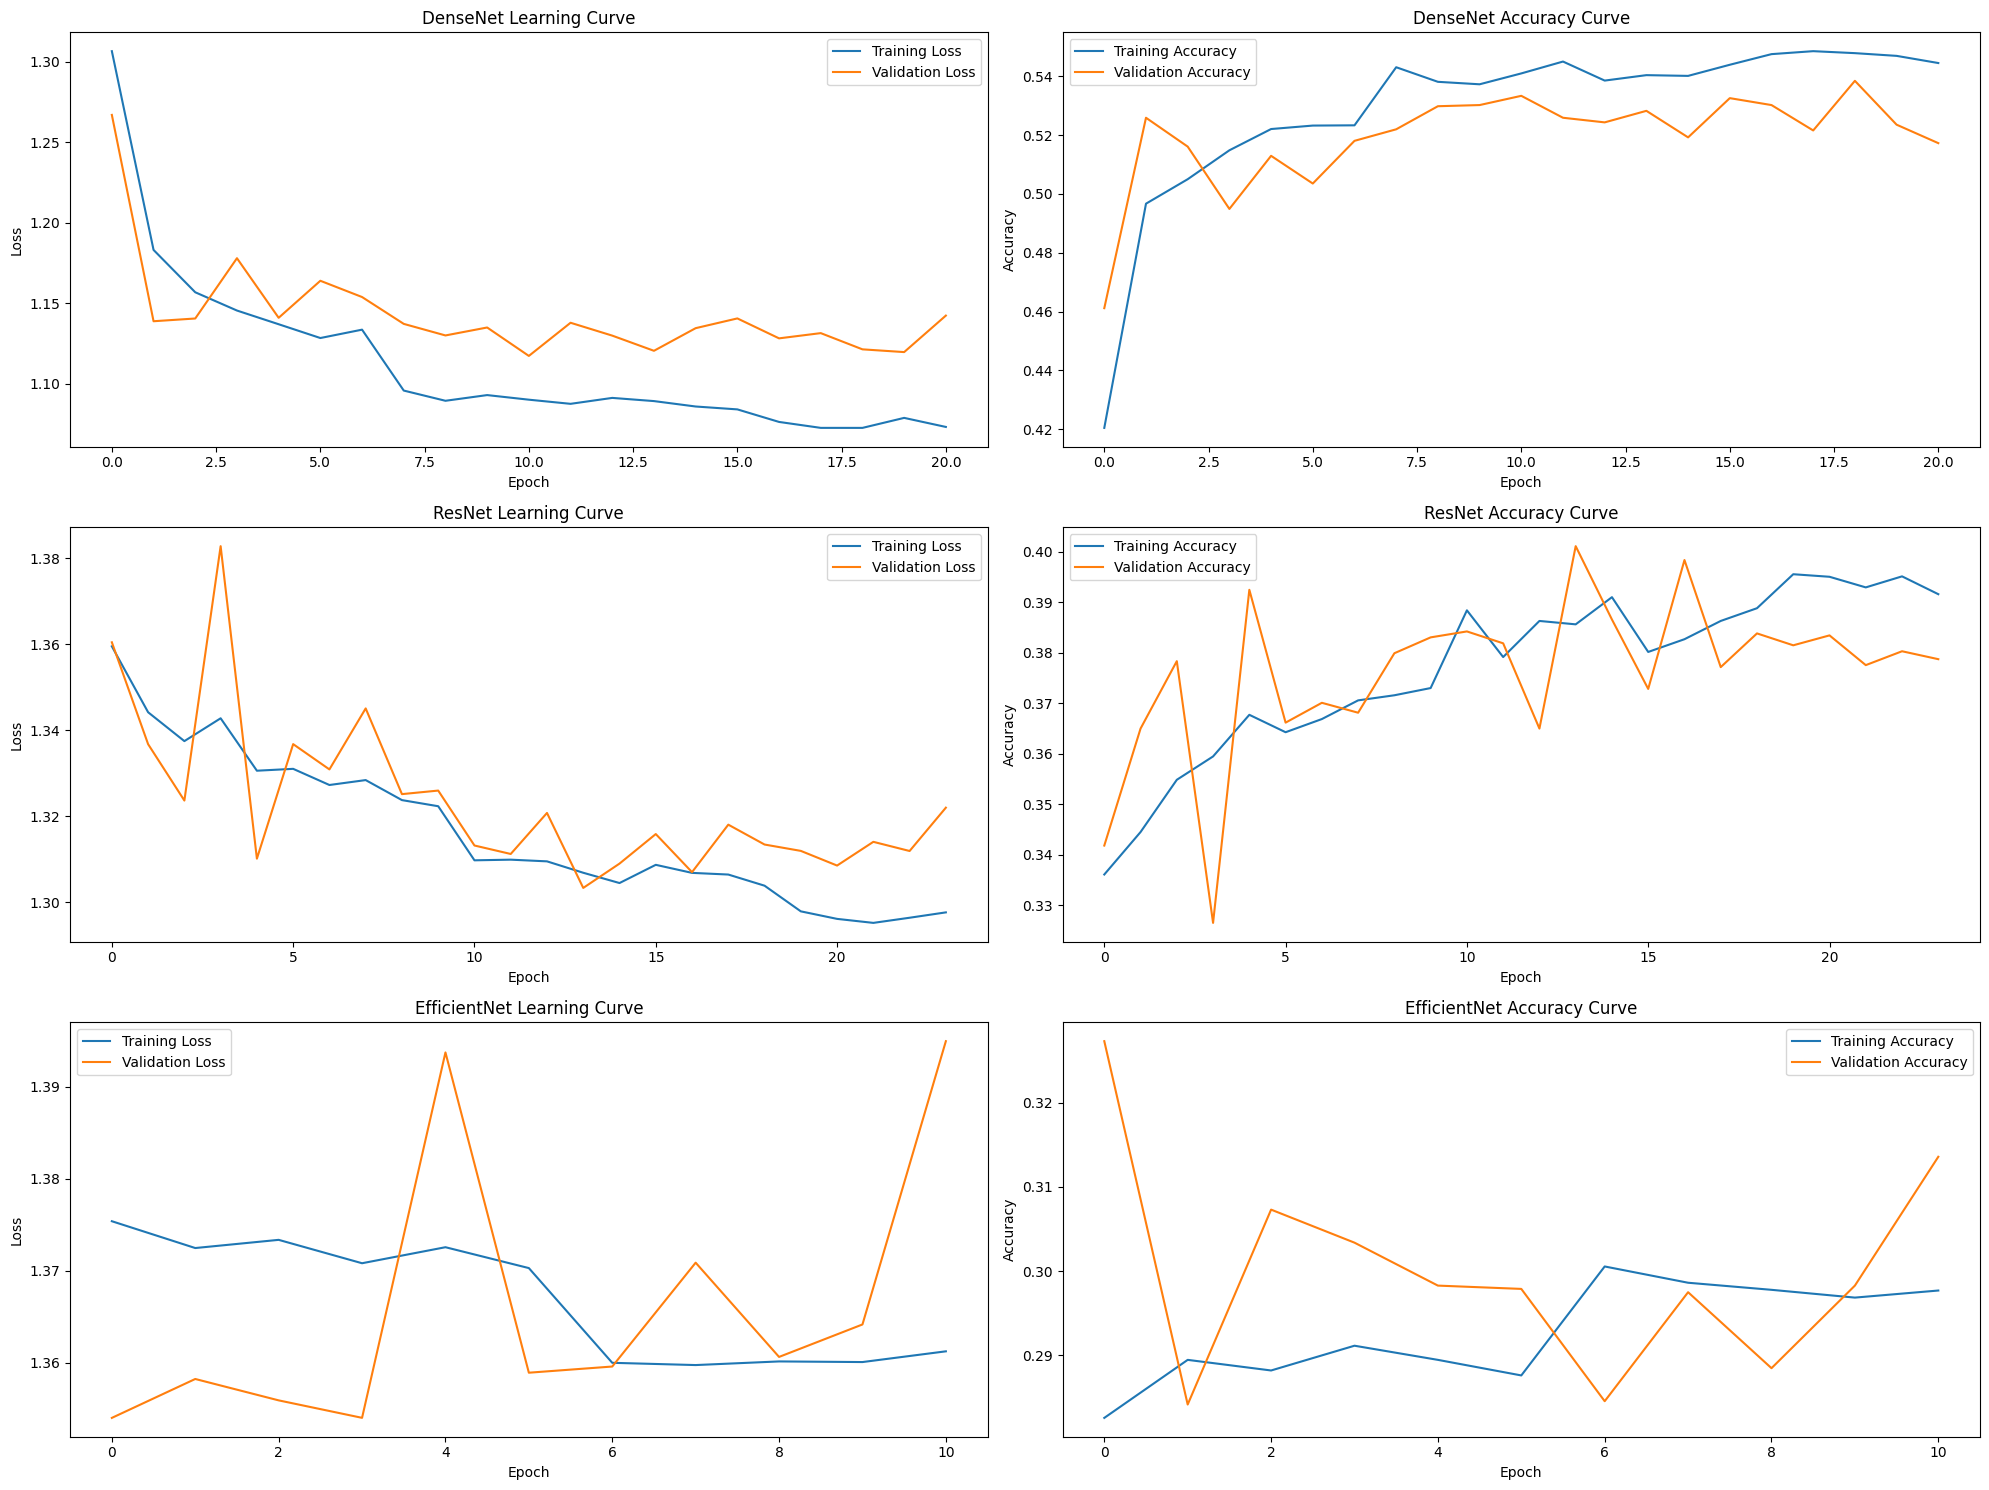

In [65]:
import matplotlib.pyplot as plt


def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()


def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()


fig, axs = plt.subplots(3, 2, figsize=(20, 15))
plot_learning_curves(densenet_history, 'DenseNet', axs[0, 0])
plot_accuracy_curves(densenet_history, 'DenseNet', axs[0, 1])

plot_learning_curves(resnet_history, 'ResNet', axs[1, 0])
plot_accuracy_curves(resnet_history, 'ResNet', axs[1, 1])

plot_learning_curves(efficientnet_history, 'EfficientNet', axs[2, 0])
plot_accuracy_curves(efficientnet_history, 'EfficientNet', axs[2, 1])

plt.tight_layout()
plt.savefig("test.jpg")
plt.show()

Url input:  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMCvylbwE7mcKEp3kjDWReEHu3ZwV73qojf0piBbLr&s


1/1 [==============================] - 1s 912ms/step
DenseNet Model Predicted Emotion: Happy (81.34%)
ResNet Model Predicted Emotion: Sad (37.34%)
EfficientNet Model Predicted Emotion: Sad (30.16%)


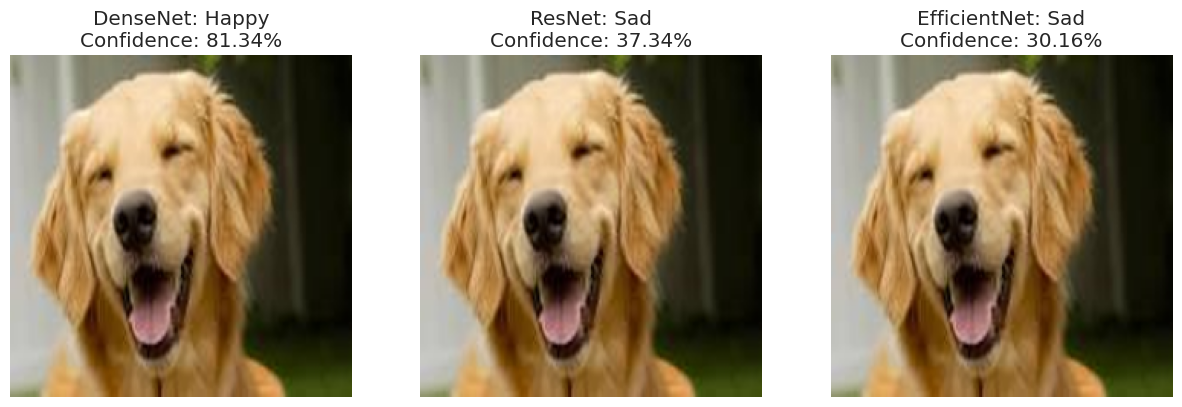

In [81]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# Load the models
densenet_model = tf.keras.models.load_model('densenet_model.h5')
resnet_model = tf.keras.models.load_model('resnet_model.h5')
efficientnet_model = tf.keras.models.load_model('efficientnet_model.h5')

# URL of the image
image_url = input("Url input: ")

# Load image from URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Preprocess the image
img = img.resize((224, 224))  # Resize the image to the expected model input size
img_array = image.img_to_array(img)  # Convert the image to a numpy array
input_data = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size
input_data /= 255.0  # Scale the image pixels values to [0, 1]

# Use the models to make predictions
predictions_densenet = densenet_model.predict(input_data)
predictions_resnet = resnet_model.predict(input_data)
predictions_efficientnet = efficientnet_model.predict(input_data)

# Decode predictions to class labels
class_labels = ['Angry', 'Happy', 'Other', 'Sad']
predicted_class_densenet = class_labels[np.argmax(predictions_densenet)]
predicted_class_resnet = class_labels[np.argmax(predictions_resnet)]
predicted_class_efficientnet = class_labels[np.argmax(predictions_efficientnet)]

# Get prediction confidence
confidence_densenet = np.max(predictions_densenet) * 100
confidence_resnet = np.max(predictions_resnet) * 100
confidence_efficientnet = np.max(predictions_efficientnet) * 100

# Print the predicted classes and confidence
print(f"DenseNet Model Predicted Emotion: {predicted_class_densenet} ({confidence_densenet:.2f}%)")
print(f"ResNet Model Predicted Emotion: {predicted_class_resnet} ({confidence_resnet:.2f}%)")
print(f"EfficientNet Model Predicted Emotion: {predicted_class_efficientnet} ({confidence_efficientnet:.2f}%)")

# Plot the image with the predicted class labels and confidence
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img)
axs[0].set_title(f"DenseNet: {predicted_class_densenet}\nConfidence: {confidence_densenet:.2f}%")
axs[0].axis('off')

axs[1].imshow(img)
axs[1].set_title(f"ResNet: {predicted_class_resnet}\nConfidence: {confidence_resnet:.2f}%")
axs[1].axis('off')

axs[2].imshow(img)
axs[2].set_title(f"EfficientNet: {predicted_class_efficientnet}\nConfidence: {confidence_efficientnet:.2f}%")
axs[2].axis('off')

plt.show()
